Примаунтим гугл диск

In [2]:
# for run notebook in collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Изучим данные о поездках для дальнейшей обработки и соединения с другими таблицами

In [3]:
rides_info = pd.read_csv('/content/drive/MyDrive/ml/mai/ml_project/rides_info.csv')
# ride_info = pd.read_csv('../data/raw/rides_info.csv') # for local run

In [4]:
rides_info.shape

(739500, 14)

In [5]:
rides_info.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822


In [6]:
rides_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            739500 non-null  object 
 1   car_id             739500 non-null  object 
 2   ride_id            739500 non-null  object 
 3   ride_date          739500 non-null  object 
 4   rating             739500 non-null  float64
 5   ride_duration      739500 non-null  int64  
 6   ride_cost          739500 non-null  int64  
 7   speed_avg          739500 non-null  int64  
 8   speed_max          736139 non-null  float64
 9   stop_times         739500 non-null  int64  
 10  distance           739500 non-null  float64
 11  refueling          739500 non-null  int64  
 12  user_ride_quality  736872 non-null  float64
 13  deviation_normal   739500 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 79.0+ MB


Скастуем ride_date к типу datetime

In [7]:
rides_info['ride_date'] = pd.to_datetime(rides_info['ride_date'])
rides_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            739500 non-null  object        
 1   car_id             739500 non-null  object        
 2   ride_id            739500 non-null  object        
 3   ride_date          739500 non-null  datetime64[ns]
 4   rating             739500 non-null  float64       
 5   ride_duration      739500 non-null  int64         
 6   ride_cost          739500 non-null  int64         
 7   speed_avg          739500 non-null  int64         
 8   speed_max          736139 non-null  float64       
 9   stop_times         739500 non-null  int64         
 10  distance           739500 non-null  float64       
 11  refueling          739500 non-null  int64         
 12  user_ride_quality  736872 non-null  float64       
 13  deviation_normal   739500 non-null  float64 

Посмотрим на распределения признаков

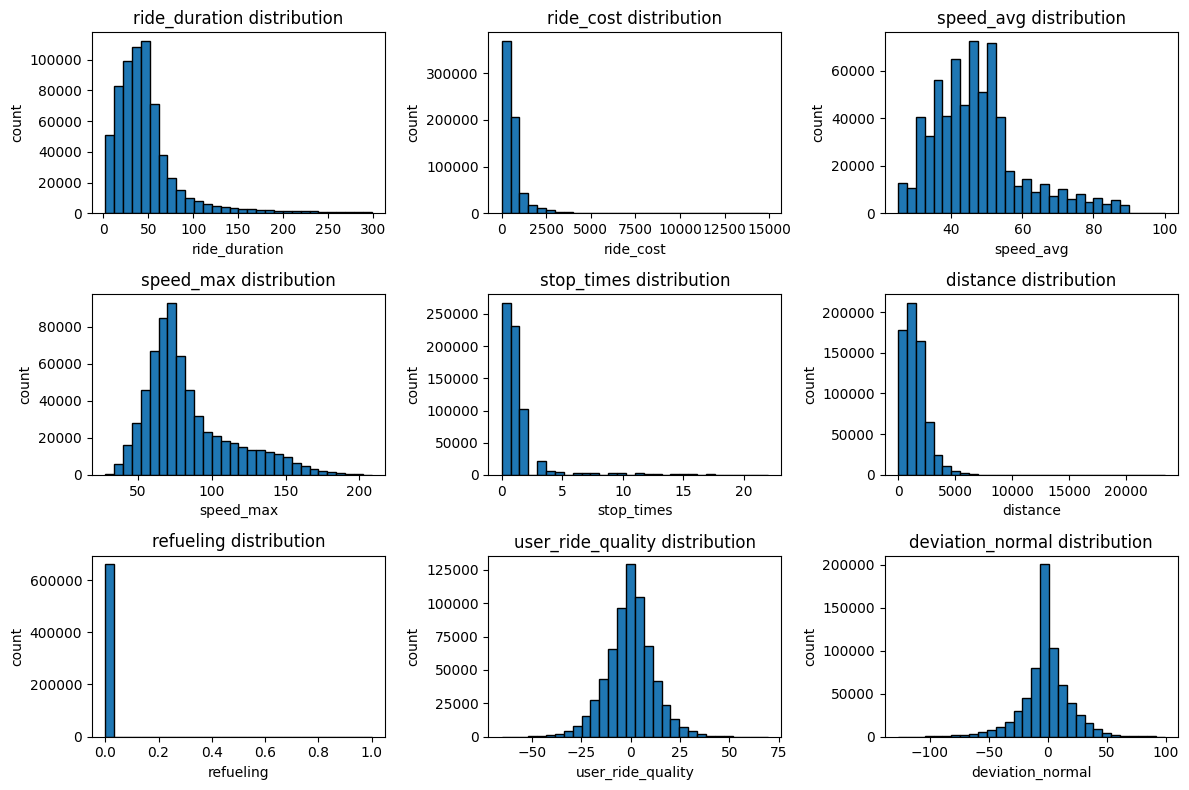

In [38]:
plt.figure(figsize=(12, 8))

for i in range(5, 14):
    plt.subplot(3, 3, i - 4)
    plt.hist(rides_info.iloc[:, i], bins=30, edgecolor='black')
    plt.title(rides_info.columns[i] + ' distribution')
    plt.xlabel(rides_info.columns[i])
    plt.ylabel('count')

plt.tight_layout()
plt.show()

Видим явные выбросы в длительности поездки, цене, дистанции. Удалим их.

Длительность поездки будем учитывать менее 5 часов.

In [45]:
rides_info = rides_info[rides_info['ride_duration'] < 60 * 5]

Дистанцию возьмем менее 7000

In [40]:
rides_info = rides_info[rides_info['distance'] < 7000]

Цену поездки будем учитывать только до 4000

In [43]:
rides_info = rides_info[rides_info['ride_cost'] < 4000]

Визуализируем еще раз.

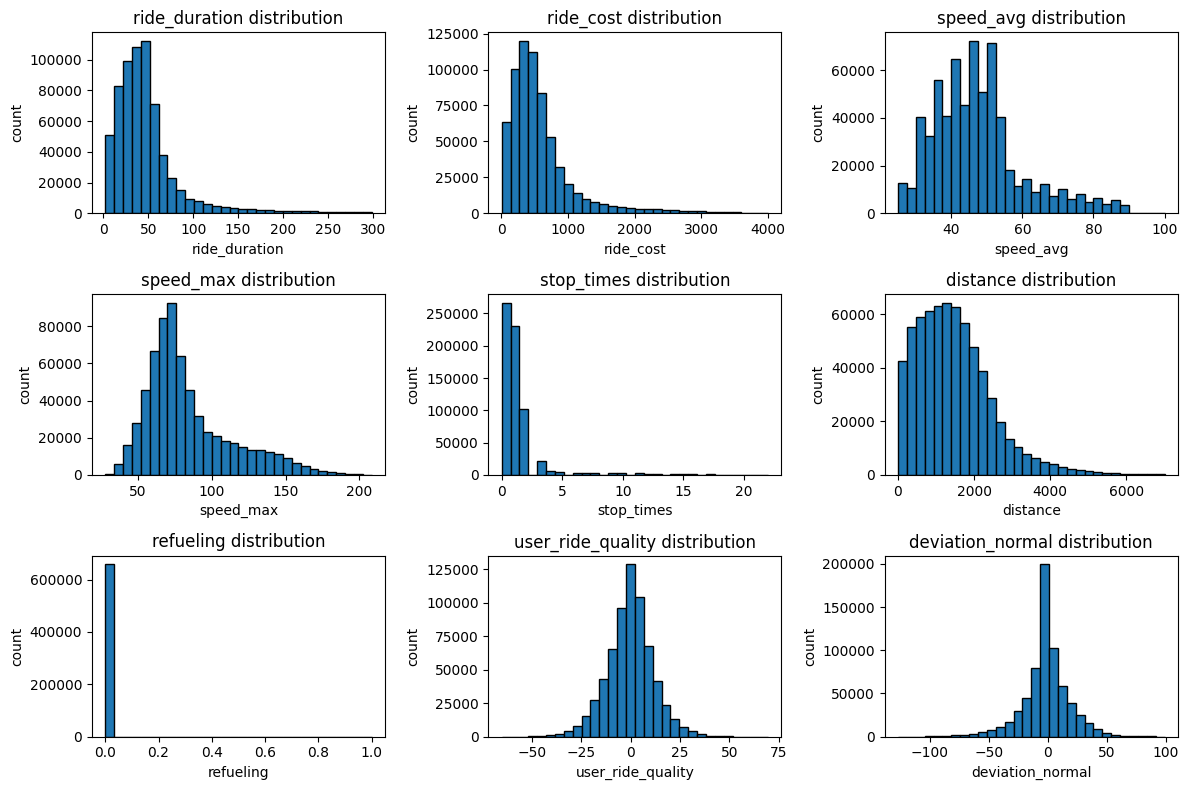

In [44]:
plt.figure(figsize=(12, 8))

for i in range(5, 14):
    plt.subplot(3, 3, i - 4)
    plt.hist(rides_info.iloc[:, i], bins=30, edgecolor='black')
    plt.title(rides_info.columns[i] + ' distribution')
    plt.xlabel(rides_info.columns[i])
    plt.ylabel('count')

plt.tight_layout()
plt.show()